In [2]:
#|default_exp app

In [3]:
import sys
print(sys.path)

['/opt/homebrew/Caskroom/miniforge/base/envs/fast/lib/python310.zip', '/opt/homebrew/Caskroom/miniforge/base/envs/fast/lib/python3.10', '/opt/homebrew/Caskroom/miniforge/base/envs/fast/lib/python3.10/lib-dynload', '', '/opt/homebrew/Caskroom/miniforge/base/envs/fast/lib/python3.10/site-packages']


In [4]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

ModuleNotFoundError: No module named 'gradio'

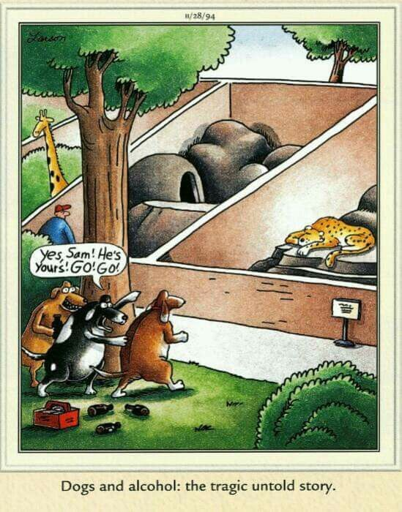

In [7]:
im = PILImage.create('images/tfh-dogs-alcohol.jpg')
im.thumbnail((512, 512))
im

In [10]:
#|export
learn = load_learner('models/02.pkl')

In [17]:
learn.predict(im)

('tfs',
 tensor(5),
 tensor([1.2918e-09, 1.6964e-08, 2.9556e-07, 7.7577e-07, 2.1975e-08, 1.0000e+00,
         2.4699e-08]))

In [32]:
#|export
categories = ('tfs', 'xk', 'dbt', 'pbs', 'rwo', 'hth', 'itb')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    print(pred)
    print(idx)
    print(probs)
    
    return dict(zip(sorted(categories), map(float, probs)))

In [33]:
classify_image(im)

tfs
tensor(5)
tensor([1.2918e-09, 1.6964e-08, 2.9556e-07, 7.7577e-07, 2.1975e-08, 1.0000e+00,
        2.4699e-08])


{'dbt': 1.2918176528486924e-09,
 'hth': 1.696379747784249e-08,
 'itb': 2.9555621949839406e-07,
 'pbs': 7.757738558211713e-07,
 'rwo': 2.1975449016053972e-08,
 'tfs': 0.999998927116394,
 'xk': 2.469870885590808e-08}